## 프로젝트 기반 빅데이터 서비스 솔루션 개발 전문 과정

#### 교과목명 : 모델 성능 평가
- 평가일 : 03.13
- 성명 :이재호
- 점수 :40(4/10)

Q1. iris data를 불러와서 붓꽃의 종류를 분류하는 모델링을 수행한 후 오차행렬과 정확도를 평가하세요.
- test_size = 0.2, 분류기는 DecisionTreeClassifier를 이용

In [26]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

import pandas as pd
iris = load_iris()
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [27]:
iris_data=iris.data
iris_label=iris.target
iris_df = pd.DataFrame(data=iris_data,columns=iris.feature_names)
iris_df['label'] = iris.target
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [28]:
X_train,X_test, y_train,y_test = train_test_split(iris_data,iris_label,test_size=0.2,random_state=11)

print(X_train.shape)
print(y_train.shape)

(120, 4)
(120,)


In [29]:
dt_clf = DecisionTreeClassifier()

dt_clf.fit(X_train,y_train)

DecisionTreeClassifier()

In [30]:
pred = dt_clf.predict(X_test)

from sklearn.metrics import accuracy_score
print(f'예측정확도:{accuracy_score(y_test,pred)}')

예측정확도:0.8666666666666667


In [31]:
from sklearn.model_selection import KFold
import numpy as np

iris = load_iris()
features = iris.data
label = iris.target
dt_clf = DecisionTreeClassifier(random_state=156)
# 5개의 폴드 세트로 분리
kfold = KFold(n_splits=5)
cv_accuracy = []

n_iter = 0
for train_index,test_index in kfold.split(features):
    X_train, X_test = features[train_index],features[test_index]
    y_train, y_test = label[train_index],label[test_index]
    
    dt_clf.fit(X_train,y_train)
    pred = dt_clf.predict(X_test)
    n_iter += 1
    
    accuracy = np.round(accuracy_score(y_test,pred),4)
    train_size = X_train.shape[0]
    test_size = X_test.shape[0]
    print(f'{n_iter}회차,정확도: {accuracy},학습용 데이터: {train_size},검증용 데이터:{test_size}')
    print(f'{n_iter}회차 검증세트 인덱스: {test_index}')
    cv_accuracy.append(accuracy)
    
print(f'평균 검증 정확도: {np.mean(cv_accuracy)}')
    

1회차,정확도: 1.0,학습용 데이터: 120,검증용 데이터:30
1회차 검증세트 인덱스: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]
2회차,정확도: 0.9667,학습용 데이터: 120,검증용 데이터:30
2회차 검증세트 인덱스: [30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53
 54 55 56 57 58 59]
3회차,정확도: 0.8667,학습용 데이터: 120,검증용 데이터:30
3회차 검증세트 인덱스: [60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83
 84 85 86 87 88 89]
4회차,정확도: 0.9333,학습용 데이터: 120,검증용 데이터:30
4회차 검증세트 인덱스: [ 90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119]
5회차,정확도: 0.7333,학습용 데이터: 120,검증용 데이터:30
5회차 검증세트 인덱스: [120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137
 138 139 140 141 142 143 144 145 146 147 148 149]
평균 검증 정확도: 0.9


Q2. 타이타닉 분석용 데이터세트인 tdf1.pkl를 불러와서 생존자 예측 모델을 만든 후 오차행렬, 정확도, 재현율, f1, AUC를 포함하는 사용자 함수를 활용하여 평가하세요.
- test_size = 0.2, 분류기는 RandomForestClassifier 이용

In [6]:
from sklearn.metrics import accuracy_score,precision_score, recall_score, confusion_matrix

def get_clf_eval(y_test,pred):
    confusion = confusion_matrix(y_test,pred)
    accuracy = accuracy_score(y_test,pred)
    precision = precision_score(y_test,pred)
    recall = recall_score(y_test,pred)
    print(f'오차행렬: {confusion} \n')
    print(f'정확도: {round(accuracy,4)}, 정밀도: {round(precision,4)}, 재현율 : {round(recall,4)}')

In [11]:
t_df = pd.read_pickle('./datasets/tdf1.pkl')
t_df

,Survived,Sex,Town_0,Town_1,Town_2,Family_Big,Family_Single,Family_Small,Age_10s,Age_20s,Age_30s,Age_40s,Age_50s,Age_Elderly,Fare_cat
0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1
1,1,0,1,0,0,0,0,1,0,0,0,1,0,0,4
2,1,0,0,0,1,0,1,0,0,0,1,0,0,0,1
3,1,0,0,0,1,0,0,1,0,0,0,1,0,0,4
4,0,1,0,0,1,0,1,0,0,0,0,1,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,1,0,0,1,0,1,0,0,0,1,0,0,0,2
887,1,0,0,0,1,0,1,0,0,1,0,0,0,0,3
888,0,0,0,0,1,0,0,1,0,0,1,0,0,0,3
889,1,1,1,0,0,0,1,0,0,0,1,0,0,0,3


Q3. Q2에서 생성한 모델로 교차검증(cv=5)을 수행하고 평균 정확도를 출력하세요.

Q4. Q2에서 생성한 예측모델에 대하여 교차 검증 및 성능 개선을 수행하세요.(GridSearchCV 활용)

Q5 ~ Q7. 'dataset/diabetes.csv'을 불러와서 아래사항을 수행하세요.
- 피마 인디언 당뇨병 예측을 로지스틱 회귀를 이용하여 수행하고 사용자 함수를 작성하여 평가(오차행렬, 정확도, 정밀도, 재현율, F1, ROC_AUC)
- 임곗값을 0.3에서 0.5까지 변화시키면서 정밀도와 재현율이 조정되는 과정을 시각화 
- 재현율 기준의 성능을 개선하기 위하여 그 값이 0이 될 수 없는 각 칼럼을 탐색하여 적절한 처리를 한 후 로지스틱 회귀로 예측 및 평가 수행(오차행렬, 정확도, 정밀도, 재현율, F1, ROC_AUC)


In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

diabetes_data = pd.read_csv('./datasets/diabetes.csv')
print(diabetes_data['Outcome'].value_counts())
diabetes_data.head(3)

0    500
1    268
Name: Outcome, dtype: int64


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


In [37]:
def get_clf_eval(y_test=None, pred=None, pred_proba=None):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)    
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬:\n',confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [38]:
def precision_recall_curve_plot(y_test=None, pred_proba_c1=None):
 
    precisions, recalls, thresholds = precision_recall_curve( y_test, pred_proba_c1)
    
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary],label='recall')
    
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend(); plt.grid()
    

In [39]:
import warnings
warnings.filterwarnings('ignore')
X = diabetes_data.iloc[:, :-1]
y = diabetes_data.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 156,\
                                                    stratify=y)

lr_clf = LogisticRegression()
lr_clf.fit(X_train , y_train)
pred = lr_clf.predict(X_test)
pred_proba = lr_clf.predict_proba(X_test)[:,1]
get_clf_eval(y_test , pred, pred_proba)

오차 행렬:
 [[88 12]
 [23 31]]
정확도: 0.7727, 정밀도: 0.7209, 재현율: 0.5741,    F1: 0.6392, AUC:0.7919


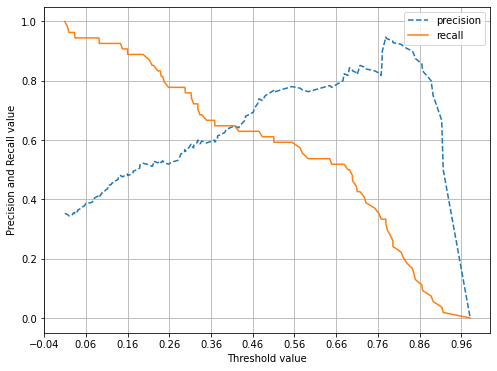

In [44]:
pred_proba_c1 = lr_clf.predict_proba(X_test)[:, 1]
precision_recall_curve_plot(y_test, pred_proba_c1)

In [40]:
X = diabetes_data.iloc[:, :-1]
y = diabetes_data.iloc[:, -1]

scaler = StandardScaler( )
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state = 156, stratify=y)

lr_clf = LogisticRegression()
lr_clf.fit(X_train , y_train)
pred = lr_clf.predict(X_test)
pred_proba = lr_clf.predict_proba(X_test)[:,1]
get_clf_eval(y_test , pred, pred_proba)



오차 행렬:
 [[90 10]
 [21 33]]
정확도: 0.7987, 정밀도: 0.7674, 재현율: 0.6111,    F1: 0.6804, AUC:0.8059


In [42]:
from sklearn.preprocessing import Binarizer
pred_proba_c1 = pred_proba.reshape(-1,1)
def get_eval_by_threshold(y_test , pred_proba_c1, thresholds):
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1) 
        custom_predict = binarizer.transform(pred_proba_c1)
        print('임곗값:',custom_threshold)
        get_clf_eval(y_test , custom_predict, pred_proba_c1)
        print()

In [43]:
thresholds = [0.3 , 0.33 ,0.36,0.39, 0.42 , 0.45 ,0.48, 0.50]
get_eval_by_threshold(y_test, pred_proba_c1, thresholds )

임곗값: 0.3
오차 행렬:
 [[69 31]
 [13 41]]
정확도: 0.7143, 정밀도: 0.5694, 재현율: 0.7593,    F1: 0.6508, AUC:0.8059

임곗값: 0.33
오차 행렬:
 [[74 26]
 [17 37]]
정확도: 0.7208, 정밀도: 0.5873, 재현율: 0.6852,    F1: 0.6325, AUC:0.8059

임곗값: 0.36
오차 행렬:
 [[76 24]
 [18 36]]
정확도: 0.7273, 정밀도: 0.6000, 재현율: 0.6667,    F1: 0.6316, AUC:0.8059

임곗값: 0.39
오차 행렬:
 [[79 21]
 [19 35]]
정확도: 0.7403, 정밀도: 0.6250, 재현율: 0.6481,    F1: 0.6364, AUC:0.8059

임곗값: 0.42
오차 행렬:
 [[81 19]
 [20 34]]
정확도: 0.7468, 정밀도: 0.6415, 재현율: 0.6296,    F1: 0.6355, AUC:0.8059

임곗값: 0.45
오차 행렬:
 [[85 15]
 [20 34]]
정확도: 0.7727, 정밀도: 0.6939, 재현율: 0.6296,    F1: 0.6602, AUC:0.8059

임곗값: 0.48
오차 행렬:
 [[88 12]
 [21 33]]
정확도: 0.7857, 정밀도: 0.7333, 재현율: 0.6111,    F1: 0.6667, AUC:0.8059

임곗값: 0.5
오차 행렬:
 [[90 10]
 [21 33]]
정확도: 0.7987, 정밀도: 0.7674, 재현율: 0.6111,    F1: 0.6804, AUC:0.8059



Q8. "dataset/auto-mpg.xlsx"을 불러와서 회귀 모델을 생성하고 MSE, RMSE, R2로 평가를 수행하세요.

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import os

df = pd.read_excel("./datasets/auto-mpg1.xlsx")
ndf = df[['mpg','cylinders','horsepower','weight']]
ndf.head()

,mpg,cylinders,horsepower,weight
0,18.0,8,130,3504
1,15.0,8,165,3693
2,18.0,8,150,3436
3,16.0,8,150,3433
4,17.0,8,140,3449


In [15]:
ndf.horsepower[ndf.horsepower == '?'] = np.nan
ndf.dropna(subset=['horsepower'],axis=0, inplace=True)
ndf.horsepower = ndf.horsepower.astype('float') 
ndf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   mpg         392 non-null    float64
 1   cylinders   392 non-null    int64  
 2   horsepower  392 non-null    float64
 3   weight      392 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 15.3 KB


In [16]:
ndf.to_pickle('./dataset/auto-mpg1.pkl')

In [17]:
X = ndf[['weight']]
y = ndf['mpg']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                   test_size=0.3,
                                                   random_state = 11)

In [18]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)
y_preds = lr.predict(X_test)

In [19]:
print(f'기울기: { lr.coef_ }')    # lr.coef가 낮게 나온이유는 그래프의 x축과 y축의 단위가 다르기 떄문이다.

print(f'절편 :{lr.intercept_}')

기울기: [-0.00762163]
절편 :45.97121770475769


In [21]:
from sklearn.metrics import mean_squared_error,r2_score

mse = mean_squared_error(y_test,y_preds)
rmse = np.sqrt(mse)
r2 = r2_score(y_test,y_preds)
print(f'mse: {mse},rmse: {rmse},r2: {r_square}')

mse: 22.168955157340807,rmse: 4.70839199274453,r2: 0.6410608728212728


Q9. 'load_boston' 을 불러와서 cross_val_score를 이용한 cv=5인 교차검증을 수행 후 MSE, RMSE를 출력하세요.(LineaRegression) 

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.datasets import load_boston
%matplotlib inline
import warnings
warnings.filterwarnings(action='ignore')

boston = load_boston()
boston_df = pd.DataFrame(boston.data,columns = boston.feature_names)
boston_df['PRICE'] = boston.target
print('Boston 데이터 세트 크키:', boston_df.shape)
boston_df.head()

Boston 데이터 세트 크키: (506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [34]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

y_target = boston_df['PRICE']
X_data = boston_df.drop(['PRICE'],axis=1, inplace=False)

X_train,X_test,y_train,y_test = train_test_split(X_data, y_target, test_size=0.3,random_state=156, )

lr = LinearRegression()
lr.fit(X_train,y_train)

y_preds = lr.predict(X_test)
mse = mean_squared_error(y_test,y_preds)
rmse = np.sqrt(mse)

print('MSE : {0:.3f}, RMSE : {1:.3F}'.format(mse,rmse))

MSE : 17.297, RMSE : 4.159


Q10. 'Q9에 대하여 R2 Score를 구하세요.(k=5) 

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

y_target = boston_df['PRICE']
X_data = boston_df.drop(['PRICE'],axis=1, inplace=False)

X_train,X_test,y_train,y_test = train_test_split(X_data, y_target, test_size=0.3,random_state=156)

lr = LinearRegression()
lr.fit(X_train,y_train)

y_preds = lr.predict(X_test)
mse = mean_squared_error(y_test,y_preds)
rmse = np.sqrt(mse)
r2_score = r2_score(y_test,y_preds)
print(f'mse: {mse},rmse: {rmse},r2_score: {r_square}')

mse: 17.296915907902054,rmse: 4.158956107955704,r2_score: 0.6410608728212728
